In [1]:
import numpy as np
import pylab as plt
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
np.random.seed(0)


/usr/lib/python3/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


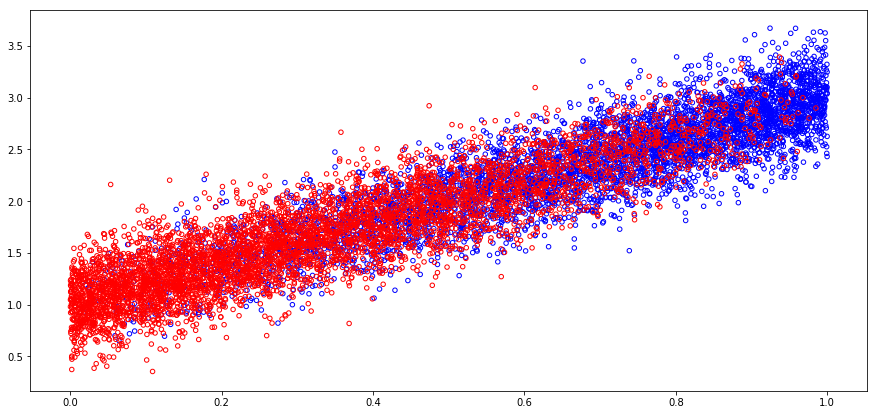

In [2]:
def f(x):
    return 2*x + 1

x=np.random.uniform(0,1,10000)


x0 = []
y0 = []

x1 = []
y1 = []

Y1=np.zeros(len(x))

X1=np.zeros((len(x),2))


for i in range(len(x)):

    
    if np.random.random() < x[i]:
        x0.append(x[i])
        y0.append( f(x[i]) + np.random.normal(0,0.25)  )

        
    else:
        x1.append(x[i])
        y1.append( f(x[i]) + np.random.normal(0,0.25) ) 
        
plt.figure(figsize=(15,7))
plt.scatter(x0,y0,s=20,facecolors='none',edgecolors='b')
plt.scatter(x1,y1,s=20,facecolors='none',edgecolors='r') # class 1
plt.show()


## Rescaling, reshaping and splitting the data for use in the neural network in training and testting

In [3]:
Y1=np.zeros(len(x0))
Y2=np.ones(len(x1))

Y=np.concatenate((Y1, Y2), axis=0)

x=np.concatenate((x0, x1), axis=0)
y=np.concatenate((y0, y1), axis=0)

X=np.stack((x, y), axis=1)


X = np.asarray(X)
Y = np.asarray(Y)

X = scale(X)
X = X.astype(float)
Y = Y.astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

X.shape , Y.shape

((10000, 2), (10000,))

# Building a Neural Network model using Keras :

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import theano
import pymc3

Using TensorFlow backend.


In [5]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, epochs=6, batch_size=100)

Epoch 1/6
7500/7500 [==============================] - 1s 70us/step - loss: 0.7465 - acc: 0.4368
Epoch 2/6
7500/7500 [==============================] - 0s 18us/step - loss: 0.6650 - acc: 0.6040
Epoch 3/6
7500/7500 [==============================] - 0s 17us/step - loss: 0.6105 - acc: 0.6905
Epoch 4/6
7500/7500 [==============================] - 0s 17us/step - loss: 0.5770 - acc: 0.7127
Epoch 5/6
7500/7500 [==============================] - 0s 17us/step - loss: 0.5588 - acc: 0.7220
Epoch 6/6
7500/7500 [==============================] - 0s 16us/step - loss: 0.5491 - acc: 0.7276


In [8]:
# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7500/7500 [==============================] - 0s 38us/step

acc: 72.88%


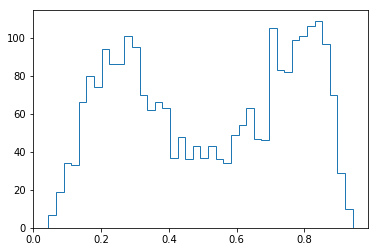

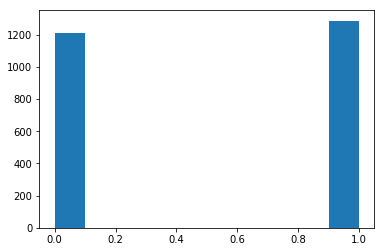

In [9]:
predictions = model.predict(X_test)
plt.hist(predictions,bins=40,histtype='step')
plt.show()

rounded = [round(x[0]) for x in predictions]
plt.hist(rounded)
plt.show()


In [10]:
c=0
for i in range(len(Y_test)):
    if rounded[i]==Y_test[i]:
        c+=1
accuracy = c/i
print(accuracy)



0.7310924369747899


# Now we use SKlearn multi layer perceptron neural network

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
%matplotlib inline

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, Y_train)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
pred=clf.predict(X_test)

cnt=0
for i in range(len(Y_test)):
    if pred[i]==Y_test[i]:
        cnt+=1
accu = cnt/i
print(accu)

score = clf.score(X_test, Y_test)
score

0.7555022008803521


0.7552